## Load Data

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_csv('data/HW3-Data-V3.csv')
df

,X,Y,class
0,1,15,0
1,2,10,1
2,2,11,1
3,2,15,1
4,3,12,0
...,...,...,...
199,110,67,1
200,109,82,1
201,115,98,1
202,112,77,1


## Plotting

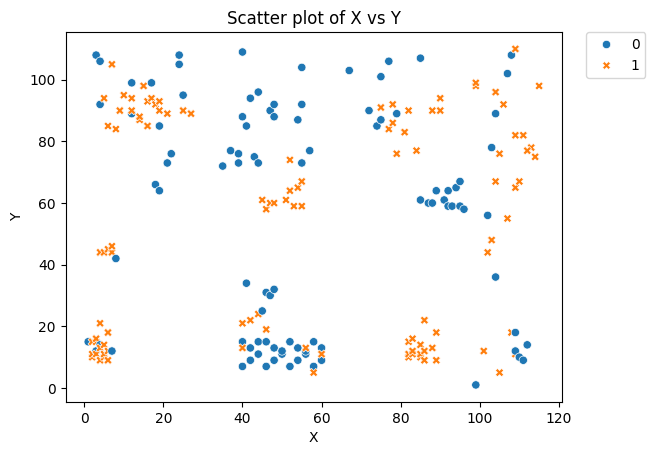

In [201]:
# plot X and Y using seaborn
sns.scatterplot(data=df, x='X', y='Y', hue='class', style='class')
plt.title('Scatter plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [202]:
# # draw the first decision boundary of a classifier
# from sklearn.tree import DecisionTreeClassifier
# X = df[['X', 'Y']]
# y = df['class']
# clf = DecisionTreeClassifier(max_depth=3)
# clf.fit(X, y)
# # plot decision boundary
# xx, yy = np.meshgrid(np.linspace(X['X'].min(), X['X'].max(), 100),
#                      np.linspace(X['Y'].min(), X['Y'].max(), 100))
# # Create DataFrame with proper column names for prediction
# mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X', 'Y'])
# Z = clf.predict(mesh_points).reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.3)
# plt.scatter(X['X'], X['Y'], c=y, edgecolor='k')
# plt.title('Decision Boundary of Decision Tree Classifier (max_depth={})'.format(clf.max_depth))
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

## Split data

In [ ]:
# 66% training and 34% testing
from sklearn.model_selection import train_test_split
X = df[['X', 'Y']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=1902) # 1121

# shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((134, 2), (70, 2), (134,), (70,))

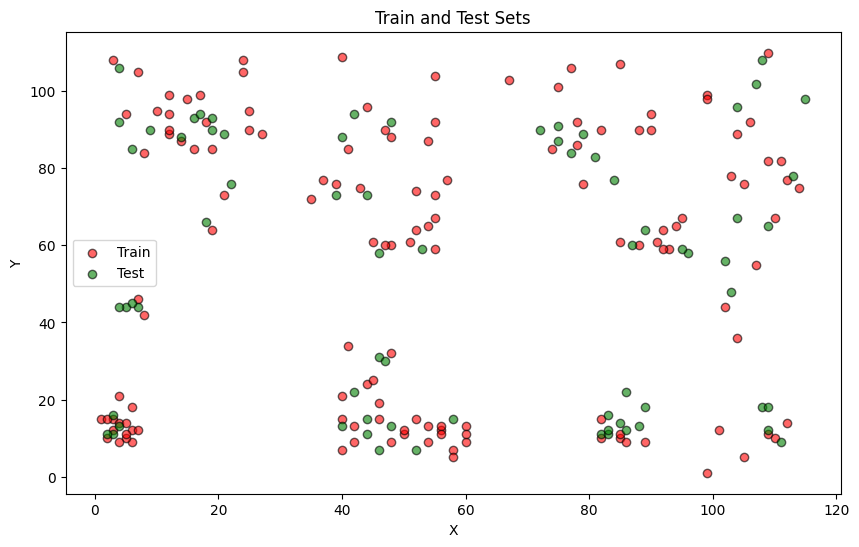

In [204]:
# plot the train and test sets on 2 different symbols
plt.figure(figsize=(10, 6))
plt.scatter(X_train['X'], X_train['Y'], c='red', label='Train', edgecolor='k', alpha=0.6)
plt.scatter(X_test['X'], X_test['Y'], c='green', label='Test', edgecolor='k', alpha=0.6)
plt.title('Train and Test Sets')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## sklearn Decision Tree

### max_depth=3

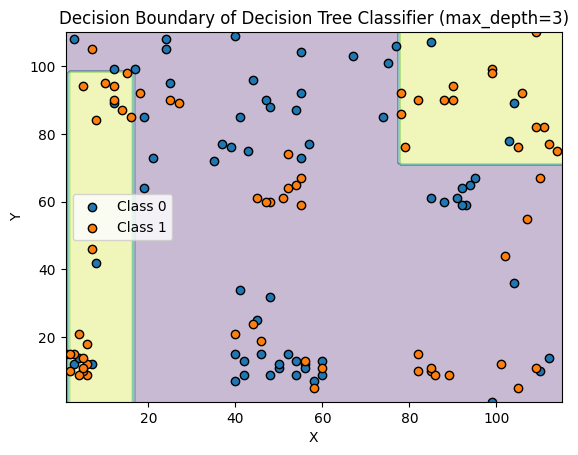

In [205]:
from sklearn.tree import DecisionTreeClassifier
clf_max_depth_3 = DecisionTreeClassifier(max_depth=3)
clf_max_depth_3.fit(X_train, y_train)
# plot decision boundary
xx, yy = np.meshgrid(np.linspace(X['X'].min(), X['X'].max(), 100),
                     np.linspace(X['Y'].min(), X['Y'].max(), 100))
# Create DataFrame with proper column names for prediction
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X', 'Y'])
Z = clf_max_depth_3.predict(mesh_points).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

# Create scatter plot with labels for legend
for class_val in y_train.unique():
    mask = y_train == class_val
    plt.scatter(X_train[mask]['X'], X_train[mask]['Y'], 
               c=f'C{class_val}', label=f'Class {class_val}', edgecolor='k')

plt.title('Decision Boundary of Decision Tree Classifier (max_depth={})'.format(clf_max_depth_3.max_depth))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Test performance

In [206]:
# test using test set
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf_max_depth_3.predict(X_test)

# to dataframe confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                     index=['Actual 0', 'Actual 1'],
                     columns=['Predicted 0', 'Predicted 1'])

print(f"(*) Confusion Matrix:\n{df_cm}")
print(f"\n(*) Classification Report:\n{classification_report(y_test, y_pred)}")

(*) Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           26            4
Actual 1           23           17

(*) Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.87      0.66        30
           1       0.81      0.42      0.56        40

    accuracy                           0.61        70
   macro avg       0.67      0.65      0.61        70
weighted avg       0.69      0.61      0.60        70



### max_depth=4

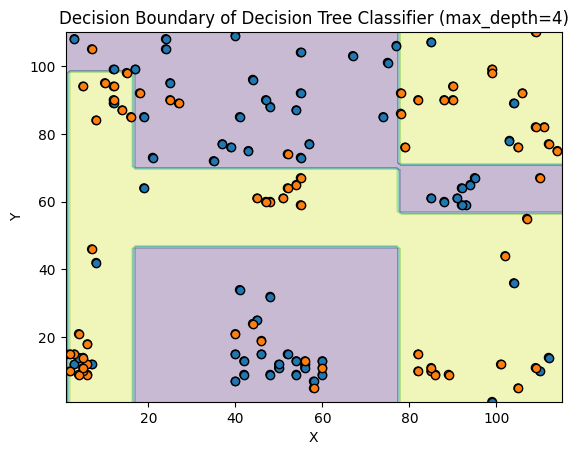

In [207]:
from sklearn.tree import DecisionTreeClassifier
clf_max_depth_4 = DecisionTreeClassifier(max_depth=4)
clf_max_depth_4.fit(X_train, y_train)
# plot decision boundary
xx, yy = np.meshgrid(np.linspace(X['X'].min(), X['X'].max(), 100),
                     np.linspace(X['Y'].min(), X['Y'].max(), 100))
# Create DataFrame with proper column names for prediction
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X', 'Y'])
Z = clf_max_depth_4.predict(mesh_points).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train['X'], X_train['Y'], c=y_train, edgecolor='k')

# Create scatter plot with labels for legend
for class_val in y_train.unique():
    mask = y_train == class_val
    plt.scatter(X_train[mask]['X'], X_train[mask]['Y'], 
               c=f'C{class_val}', label=f'Class {class_val}', edgecolor='k')

plt.title('Decision Boundary of Decision Tree Classifier (max_depth={})'.format(clf_max_depth_4.max_depth))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [208]:
# test using test set
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf_max_depth_4.predict(X_test)

# to dataframe confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                     index=['Actual 0', 'Actual 1'],
                     columns=['Predicted 0', 'Predicted 1'])

print(f"(*) Confusion Matrix:\n{df_cm}")
print(f"\n(*) Classification Report:\n{classification_report(y_test, y_pred)}")

(*) Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           21            9
Actual 1           10           30

(*) Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.77      0.75      0.76        40

    accuracy                           0.73        70
   macro avg       0.72      0.72      0.72        70
weighted avg       0.73      0.73      0.73        70



## Consider the 120x120 grid as test data

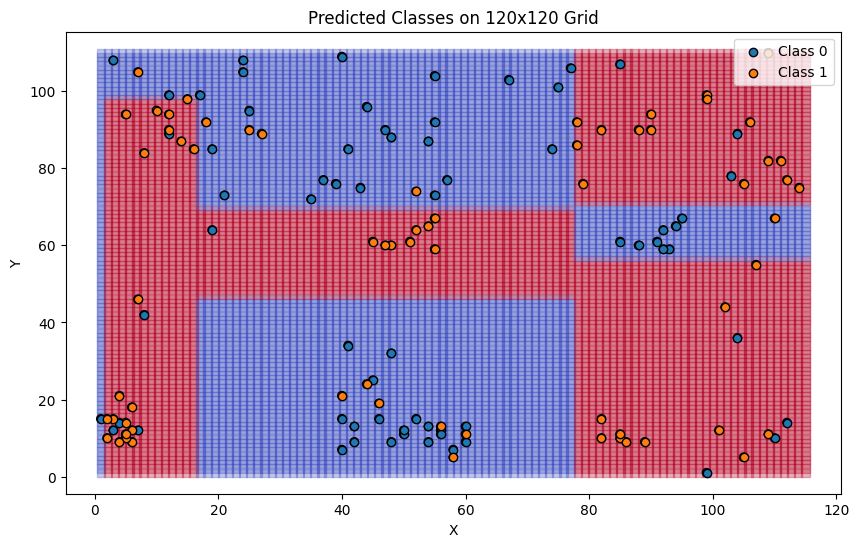

In [209]:
# cnsider the 120x120 grid as test data
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X', 'Y'])
grid_predictions = clf_max_depth_4.predict(grid_points)

# plot the predicted classes on the grid
plt.figure(figsize=(10, 6))
plt.scatter(grid_points['X'], grid_points['Y'], c=grid_predictions, cmap='coolwarm', alpha=0.3, marker='s')
plt.scatter(X_train['X'], X_train['Y'], c=y_train, edgecolor='k')

# Create scatter plot with labels for legend
for class_val in y_train.unique():
    mask = y_train == class_val
    plt.scatter(X_train[mask]['X'], X_train[mask]['Y'], 
               c=f'C{class_val}', label=f'Class {class_val}', edgecolor='k')

plt.title('Predicted Classes on 120x120 Grid')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()